In [17]:
#criação de conjuntos de modelos e avaliar a melhor performance entre eles
#random forest irá crirar modelos diferentes com árvores de decisão com variar em termos de linhas, colunas entre outros
#o modelo que tiver a melhor performance será o escolhido

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [19]:
credito = pd.read_csv('Credit.csv')
credito.head()


checking_status  duration                    credit_history  \
0              <0         6  'critical/other existing credit'   
1        0<=X<200        48                   'existing paid'   
2   'no checking'        12  'critical/other existing credit'   
3              <0        42                   'existing paid'   
4              <0        24              'delayed previously'   

               purpose  credit_amount      savings_status employment  \
0             radio/tv           1169  'no known savings'        >=7   
1             radio/tv           5951                <100     1<=X<4   
2            education           2096                <100     4<=X<7   
3  furniture/equipment           7882                <100     4<=X<7   
4            'new car'           4870                <100     1<=X<4   

   installment_commitment       personal_status other_parties  ...  \
0                       4         'male single'          none  ...   
1                       2  'female div/dep/mar'          none  ...   
2                       2         'male single'          none  ...   
3                       2         'male single'     guarantor  ...   
4                       3         'male single'          none  ...   

    property_magnitude age  other_payment_plans     housing existing_credits  \
0        'real estate'  67                 none         own                2   
1        'real estate'  22                 none         own                1   
2        'real estate'  49                 none         own                1   
3     'life insurance'  45                 none  'for free'                1   
4  'no known property'  53                 none  'for free'                2   

                    job num_dependents  own_telephone foreign_worker class  
0               skilled              1            yes            yes  good  
1               skilled              1           none            yes   bad  
2  'unskilled resident'              2           none            yes  good  
3               skilled              2           none            yes  good  
4               skilled              2           none            yes   bad  

[5 rows x 21 columns]

In [20]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values


In [21]:
LabelEncoder = LabelEncoder()
previsores[:,0] = LabelEncoder.fit_transform(previsores[:,0])
previsores[:,2] = LabelEncoder.fit_transform(previsores[:,2])
previsores[:,3] = LabelEncoder.fit_transform(previsores[:,3])
previsores[:,5] = LabelEncoder.fit_transform(previsores[:,5])
previsores[:,6] = LabelEncoder.fit_transform(previsores[:,6])
previsores[:,8] = LabelEncoder.fit_transform(previsores[:,8])
previsores[:,9] = LabelEncoder.fit_transform(previsores[:,9])
previsores[:,11] = LabelEncoder.fit_transform(previsores[:,11])
previsores[:,13] = LabelEncoder.fit_transform(previsores[:,13])
previsores[:,14] = LabelEncoder.fit_transform(previsores[:,14])
previsores[:,16] = LabelEncoder.fit_transform(previsores[:,16])
previsores[:,18] = LabelEncoder.fit_transform(previsores[:,18])
previsores[:,19] = LabelEncoder.fit_transform(previsores[:,19])


In [22]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state=0)

In [23]:
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(X_treinamento, y_treinamento)


RandomForestClassifier()

In [24]:
floresta.estimators_[1]

DecisionTreeClassifier(max_features='auto', random_state=105220062)

In [25]:
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)


In [26]:
confusao

array([[ 38,  48],
       [ 17, 197]], dtype=int64)

In [27]:
taxa_acerto

0.7833333333333333

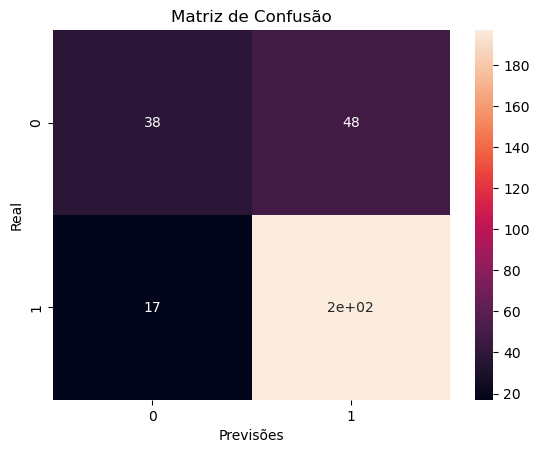

In [28]:
sns.heatmap(confusao, annot=True)
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [29]:
#curva ROC
#floresta.classes_
#floresta.predict_proba(X_teste)
probabilidade = floresta.predict_proba(X_teste)
probabilidade = probabilidade[:,1]
roc = roc_auc_score(y_teste, probabilidade)
roc


0.7898554662029994

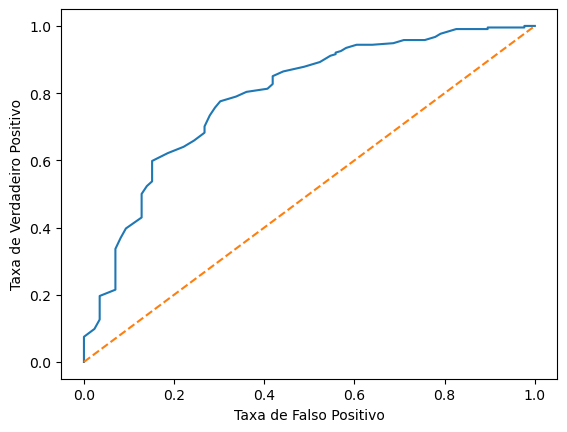

In [33]:
#plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, probabilidade)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.show()


In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot several trees from the forest
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 10), dpi=900)
for index in range(0, 3):
    plot_tree(floresta.estimators_[index],
              filled = True,
              ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)


plt.show()

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check the number of features used in the forest
num_caracteristicas = previsores.shape[1]

# Use only the first 'num_caracteristicas' columns
nomes_colunas = credito.columns[:num_caracteristicas]

# Create a figure with three subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 10), dpi=900)

for index in range(0, 3):
    # Get the feature importances for the current tree
    importances = floresta.estimators_[index].feature_importances_
    
    # Order the features by importance
    ordered_indices = np.argsort(importances)
    ordered_importances = importances[ordered_indices]
    ordered_nomes_colunas = nomes_colunas[ordered_indices]
    
    # Create a barplot of the feature importances with a color gradient
    sns.barplot(x=ordered_importances, y=ordered_nomes_colunas, ax=axes[index], palette="Blues")
    
    # Set labels and title
    axes[index].set_xlabel("Importância")
    axes[index].set_ylabel("Características")
    axes[index].set_title("Importância das Características - Árvore " + str(index))

# Show the plot
plt.tight_layout()
plt.show()

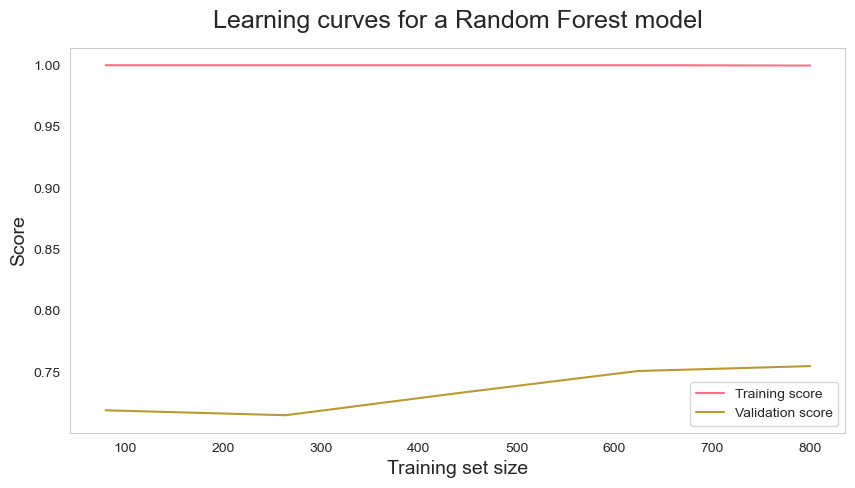

In [44]:
import seaborn as sns
from sklearn.model_selection import learning_curve

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Define the number of training examples for which to compute the learning curve
train_sizes = [0.1, 0.33, 0.55, 0.78, 1.0]

# Compute the learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=floresta,
    X=previsores,
    y=classe,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
)

# Compute the mean and standard deviation of the training scores and validation scores
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, validation_scores_mean, label='Validation score')
plt.ylabel('Score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a Random Forest model', fontsize=18, y=1.03)
plt.legend()
plt.grid()
plt.show()

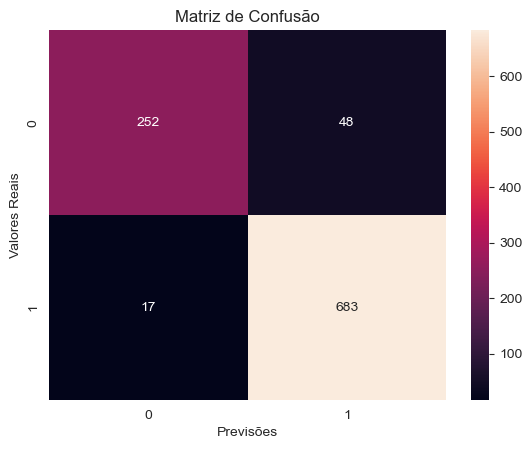

In [47]:
from sklearn.metrics import confusion_matrix

# Primeiro, faça as previsões usando o seu modelo
previsoes = floresta.predict(previsores)

# Crie a matriz de confusão
cm = confusion_matrix(classe, previsoes)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()